<a href="https://colab.research.google.com/github/vifilio/sandbox/blob/main/notebooks/colab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representing large datasets for visual analysis



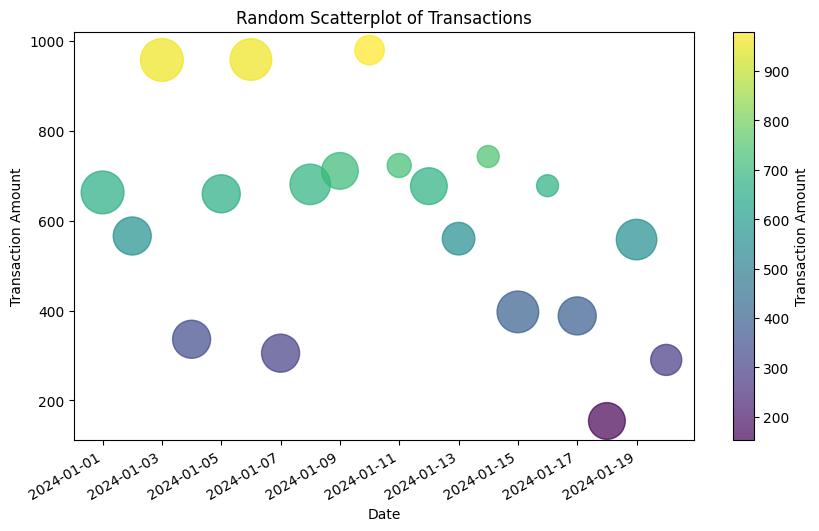

In [4]:
# prompt: generate a random scatterplot with circles representing the number of clustered smaller circles in a larger circle. the x axis to reflect dates and the y axis to reflect the amount of a transaction processed

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import random

# Generate random data
num_points = 20
dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(num_points)]
transactions = np.random.randint(100, 1000, num_points)
cluster_sizes = np.random.randint(5, 20, num_points)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with circle sizes reflecting cluster sizes
scatter = ax.scatter(dates, transactions, s=cluster_sizes * 50, c=transactions, cmap='viridis', alpha=0.7)

# Format the x-axis to show dates
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate() # Rotate date labels for readability

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Transaction Amount')
ax.set_title('Random Scatterplot of Transactions')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Transaction Amount')

# Display the plot
plt.show()

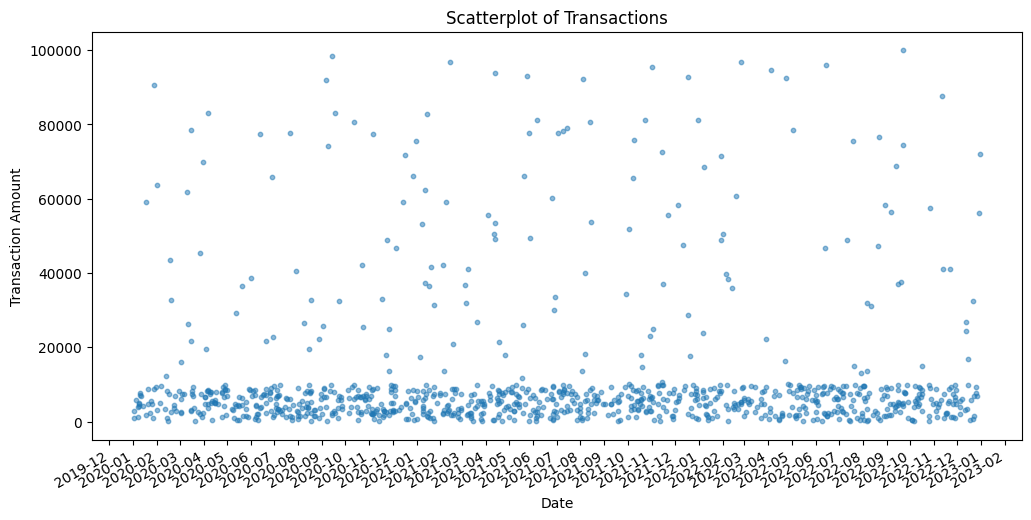

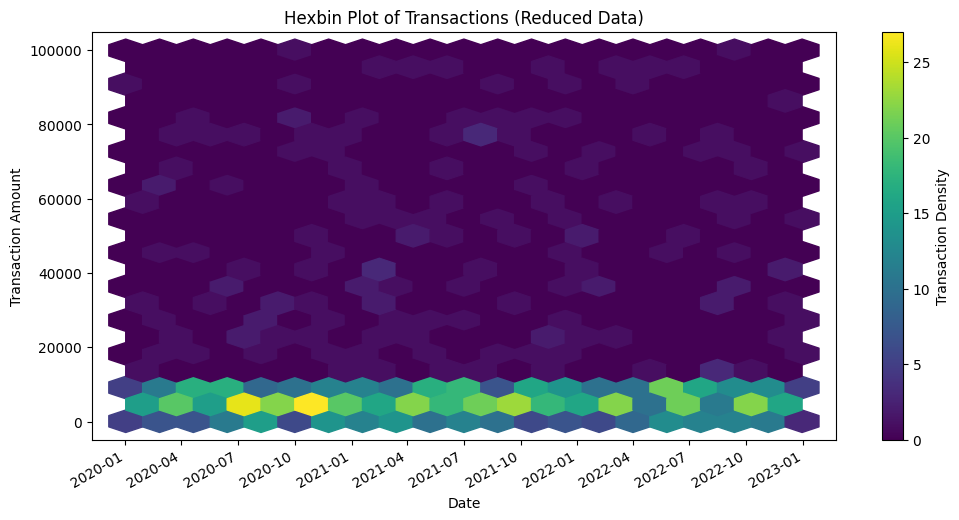

In [22]:
# prompt: generate a scatterplot with 1000 circles where x-axis represents 36 months starting January 2020 and y-axis represents amount between 1 and 100000. show a concentration of more transactions between 100 and 10000. If I could only render 100 data points, how would you represent the scatterplot?

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import random

# Generate 1000 data points
num_points = 1000
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2022, 12, 31)
dates = [start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_points)]
transactions = []
for _ in range(num_points):
    # Concentrate transactions between 100 and 10000
    if random.random() < 0.8:  # 80% chance of being in this range
        transactions.append(random.randint(100, 10000))
    else:
        transactions.append(random.randint(1, 100000))

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(dates, transactions, s=10, alpha=0.5)

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Scatterplot of Transactions')
plt.show()


# If only 100 data points can be rendered, use a hexbin plot or 2D histogram
plt.figure(figsize=(12, 6))
plt.hexbin(mdates.date2num(dates), transactions, gridsize=20, cmap='viridis')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Hexbin Plot of Transactions (Reduced Data)')
plt.colorbar(label='Transaction Density')
plt.show()

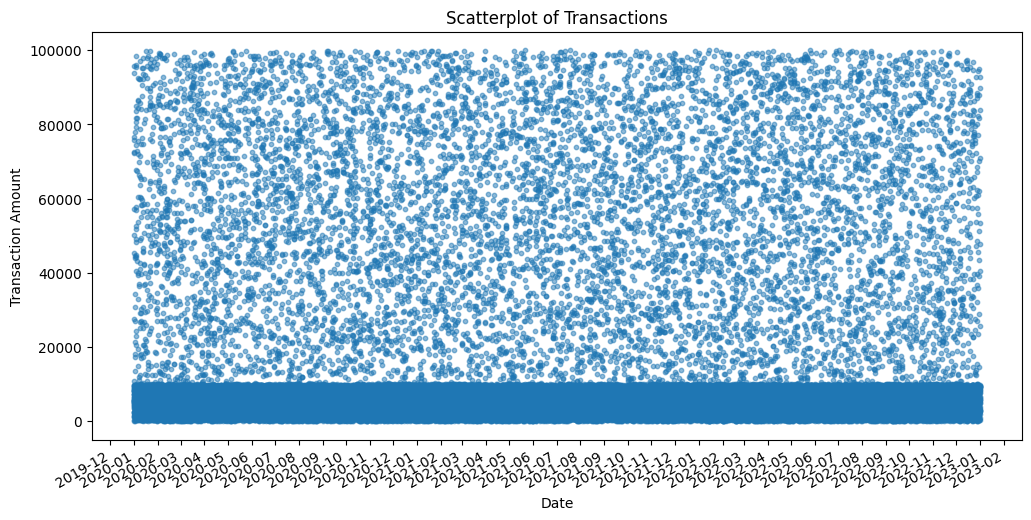

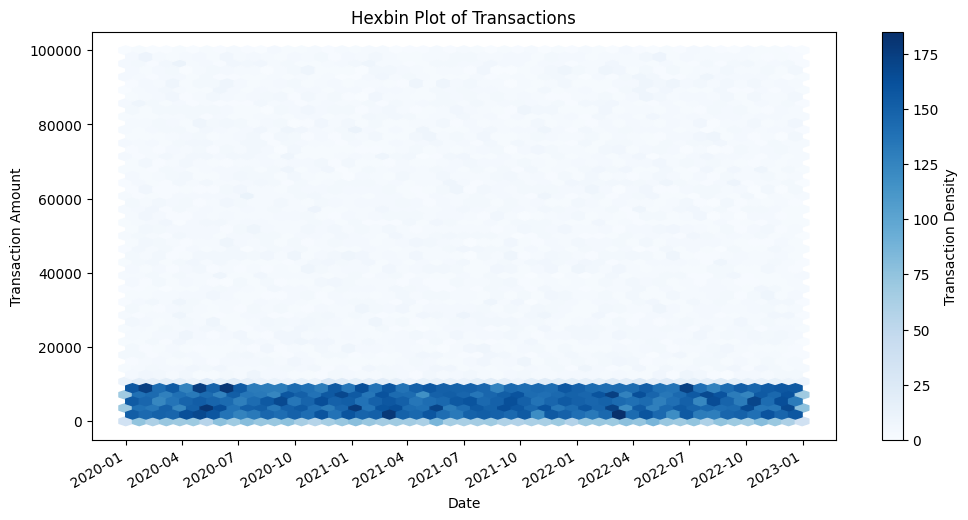

In [49]:
# prompt: generate a scatterplot with 1000 circles where x-axis represents 36 months starting January 2020 and y-axis represents amount between 1 and 100000. show a concentration of more transactions between 100 and 10000 and add some anomalies in different areas. Use a hex bin plot with 20 bins. Show both the scatterplot and the hex bin plot. Use a blue color range for hex bin plots to show density.

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import random

# Generate 1000 data points
num_points = 50000
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2022, 12, 31)
dates = [start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_points)]
transactions = []
for _ in range(num_points):
    # Concentrate transactions between 100 and 10000
    if random.random() < 0.8:  # 80% chance of being in this range
        transactions.append(random.randint(100, 10000))
    else:
        transactions.append(random.randint(1, 100000))

# Add some anomalies
anomalies = [(datetime.date(2020, 3, 15), 90000), (datetime.date(2021, 8, 1), 50000), (datetime.date(2022, 11, 1), 95000)]
dates.extend([date for date, amount in anomalies])
transactions.extend([amount for date, amount in anomalies])


# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(dates, transactions, s=10, alpha=0.5)

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Scatterplot of Transactions')
plt.show()


# Hexbin plot
plt.figure(figsize=(12, 6))
plt.hexbin(mdates.date2num(dates), transactions, gridsize=50, cmap='Blues')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Hexbin Plot of Transactions')
plt.colorbar(label='Transaction Density')
plt.show()

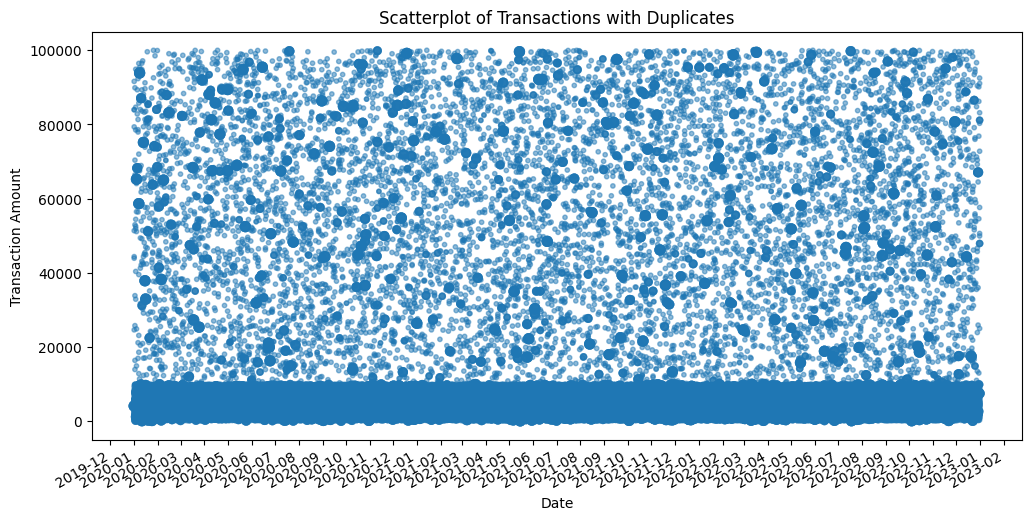

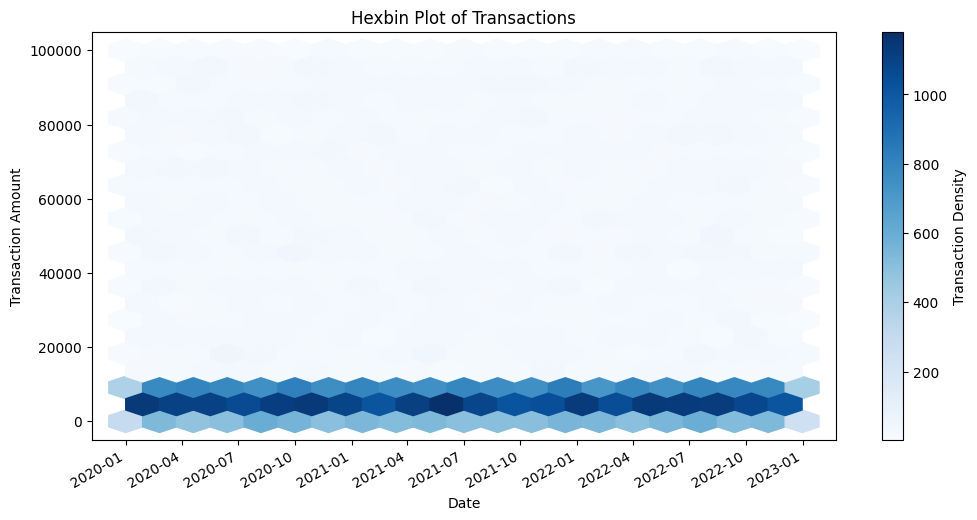

In [56]:
# prompt: generate a scatterplot with 1000 circles where x-axis represents 36 months starting January 2020 and y-axis represents amount between 1 and 100000. show a concentration of more transactions between 100 and 10000 and add some anomalies in different areas. Use a hex bin plot with 20 bins. Show both the scatterplot and the hex bin plot. Use a blue color range for hex bin plots to show density. In the scatterplot, render larger circles for data points that are duplicates (exactly overlap). render some random examples with different numbers of duplicate data points.

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import random

# Generate 1000 data points
num_points = 50000
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2022, 12, 31)

dates = []
transactions = []
duplicates = {}

for _ in range(num_points):
    date = start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days))
    amount = random.randint(1, 100000)

    # Concentrate transactions between 100 and 10000
    if random.random() < 0.8:
      amount = random.randint(100,10000)

    dates.append(date)
    transactions.append(amount)

    # Simulate duplicates
    if random.random() < 0.05:  # 5% chance of a duplicate
      duplicate_count = random.randint(2, 5)
      for _ in range(duplicate_count):
        dates.append(date)
        transactions.append(amount)

        key = (date, amount)
        if key not in duplicates:
          duplicates[key] = 0
        duplicates[key] += 1


# Create scatter plot
plt.figure(figsize=(12, 6))

# Determine circle sizes based on duplicates
sizes = [10] * len(dates)

for i in range(len(dates)):
  key = (dates[i],transactions[i])
  if key in duplicates:
      sizes[i] = duplicates[key] * 10

plt.scatter(dates, transactions, s=sizes, alpha=0.5)


# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Scatterplot of Transactions with Duplicates')

plt.show()

# Hexbin plot
plt.figure(figsize=(12,6))
plt.hexbin(mdates.date2num(dates), transactions, gridsize=20, cmap='Blues')

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.title("Hexbin Plot of Transactions")
plt.colorbar(label="Transaction Density")

plt.show()